## Lorenz System!
Part of FYP Masters project by Raihaan Usman

In [1]:
from backend.solver import Lorenz
from backend import CRCM, QRCM

import numpy as np

#### Configuring the Lorenz solver (3DoF)

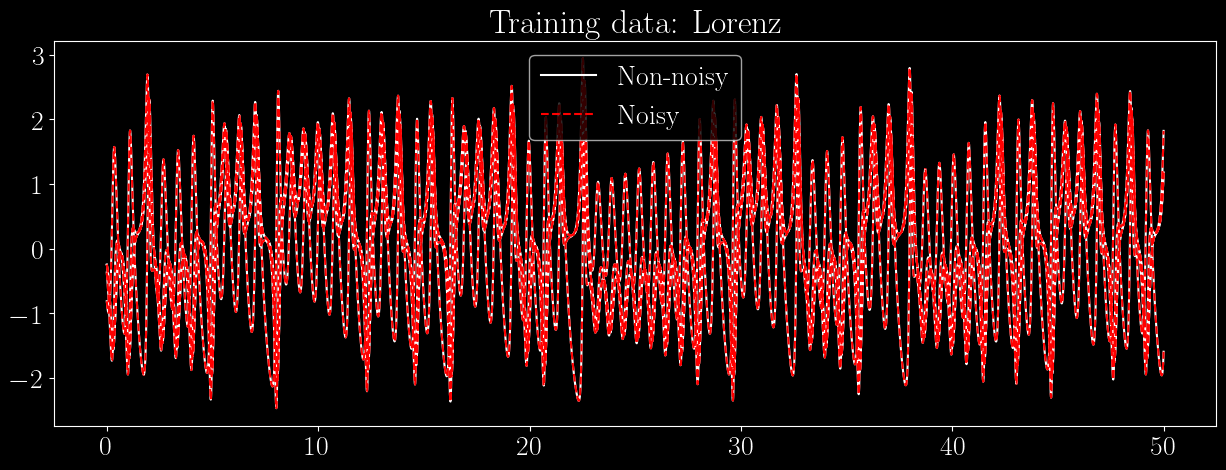

In [2]:
# Data generation parameters
upsample        = 1                    # To increase the dt of the ESN wrt the numerical integrator
dt              = 1e-2 * upsample       # Time step

lor_params      = {'beta' : 8/3,        # Parameters for the Lorenz system
                   'rho'  : 28,
                   'sigma': 10}

# Define N for transient, washout, training, validation and testing
N_transient     = 100
N_washout       = 10
N_train         = 50
N_test          = 5
N_sets          = (np.array([N_transient, N_washout, N_train, N_test]) / dt).astype(int)

# Instantiate the solver object with random initial state
lor3 = Lorenz(lor_params, dt/upsample, N_sets, noise=1e-3)
lor3.generate()            # Can always be regenerated with an Autoencoder later
lor3.plot()

#### CRCM for Lorenz system

Closed Loop: 100%|██████████| 499/499 [00:00<00:00, 6929.20it/s]


MSE: 474448.12991367583


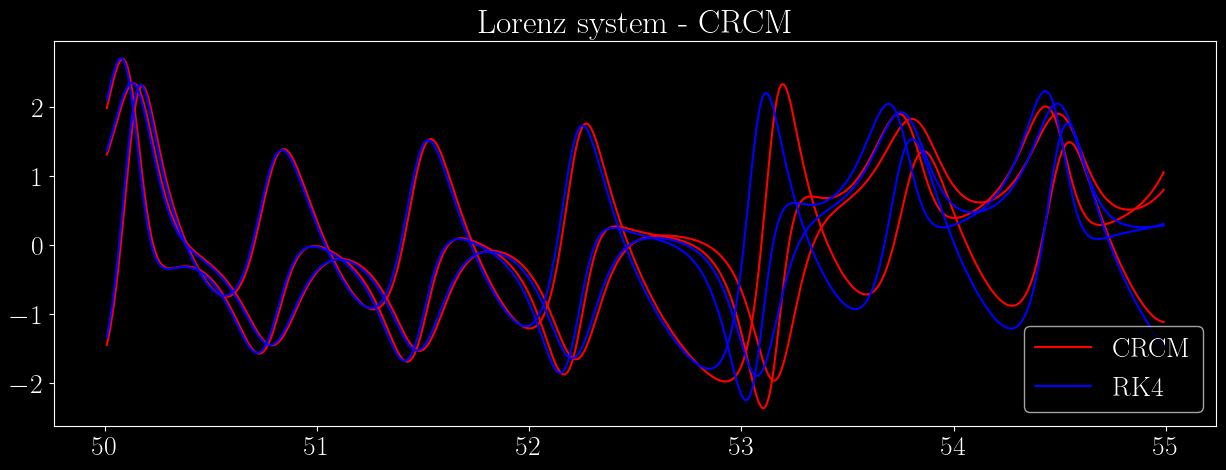

In [3]:
# Initialise the ESN
crcm = CRCM(solver=lor3,
            N_units=500,
            connectivity=10,
            eps=5e-2,
            tik=1e-4,
            # sigmoid
            activation=lambda x: 1/(1+np.exp(-x)),
            seed=0)
# Train the ESN with the training data
crcm.train()
crcm.forward()

#### QRCM for Lorenz system

x0: 0.5, x1: 0.01, x2: 0.01


Closed Loop: 100%|██████████| 499/499 [00:22<00:00, 21.90it/s]


MSE: 10526233.08528785


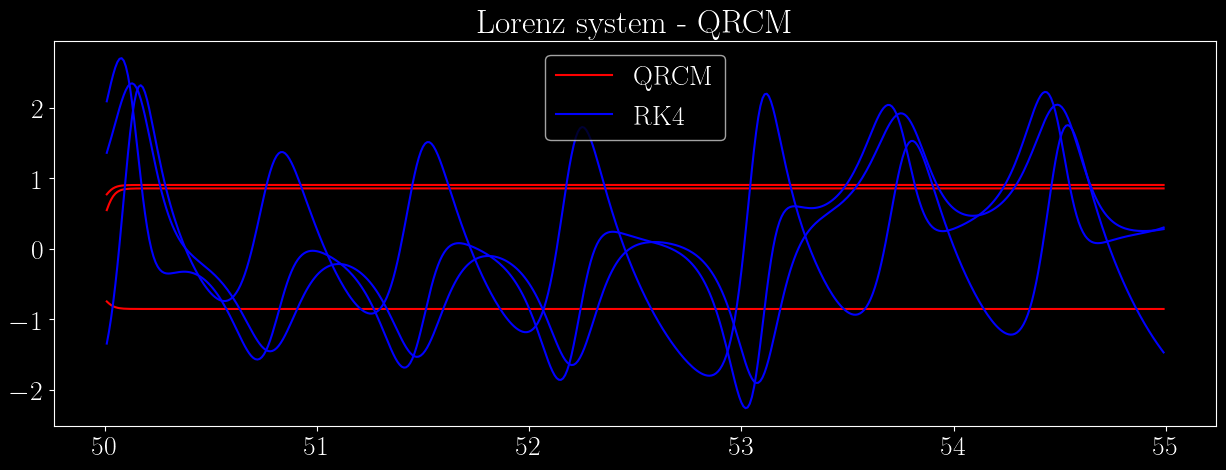

In [4]:
# Instantiate the QRCM object
qrcm = QRCM(solver  = lor3,
            qubits  = 3,
            eps     = 5e-2,
            tik     = 1e-4,
            plot    = True)

# Train the QRCM with the training data
qrcm.train()
qrcm.forward()